# Titanic Classification Using Python

# ASHISH AHLAWAT

In [8]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [42]:
titan=pd.read_csv("C:\\Users\\om\\Desktop\\Bharat Intern Project\\Titanic Classification\\test.csv")
titan.head()
train=pd.read_csv("C:\\Users\\om\\Desktop\\Bharat Intern Project\\Titanic Classification\\train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
titan.shape

(418, 11)

In [37]:
titan.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
titan.size

4598

In [14]:
#dropping the cabin columns as it had major null values
titan.drop('Cabin',axis=1, inplace=True)

In [15]:
titan.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#  Visualization 

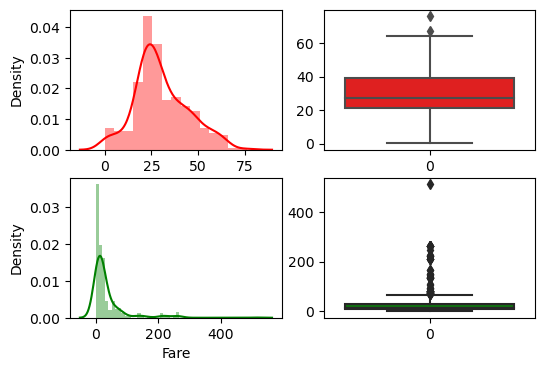

In [16]:
plt.figure(figsize=(6,4))

plt.subplot(2,2,1)
sns.distplot(titan['Age'],color='Red')
plt.subplot(2,2,2)
sns.boxplot(titan['Age'],color='Red')

plt.subplot(2,2,3)
sns.distplot(titan['Fare'],color='Green')
plt.subplot(2,2,4)
sns.boxplot(titan['Fare'],color='Green')

plt.show()

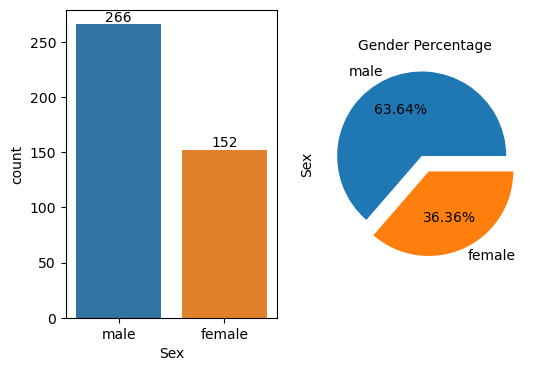

In [23]:
plt.figure(figsize=(6,4))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Sex', data=titan)
ax.bar_label(ax.containers[0])

ax =plt.subplot(1,2,2)
##ax =titan['Sex'].value_counts().plot.pie(explode=[0.1,0.1]), autopct='%1.2f%%';
ax = titan['Sex'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%')
ax.set_title(label = "Gender Percentage" , fontsize = 10);

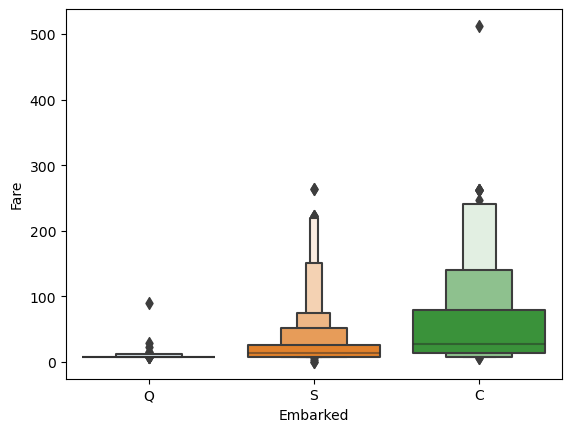

In [24]:
sns.boxenplot(y='Fare', x='Embarked', data=titan)
plt.show()

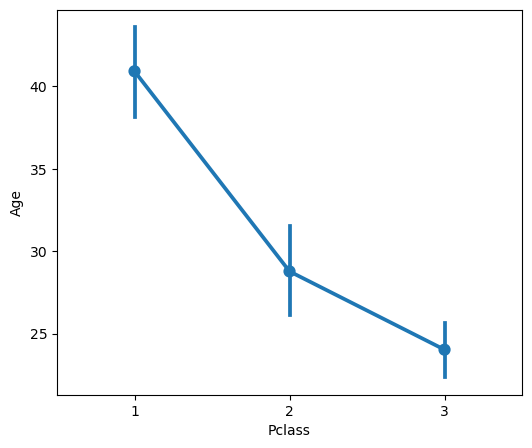

In [27]:
f, ax=plt.subplots(figsize=(6,5))
sns.pointplot(x='Pclass',y='Age',data=titan)
plt.show()

# Lower Class passengers were mostly young people

In [44]:
print(train.columns)
print(train.dtypes)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [46]:
print(train['Survived'].unique())

[0 1]


In [47]:
train['Survived'] = train['Survived'].astype('category')

<Axes: xlabel='Embarked', ylabel='count'>

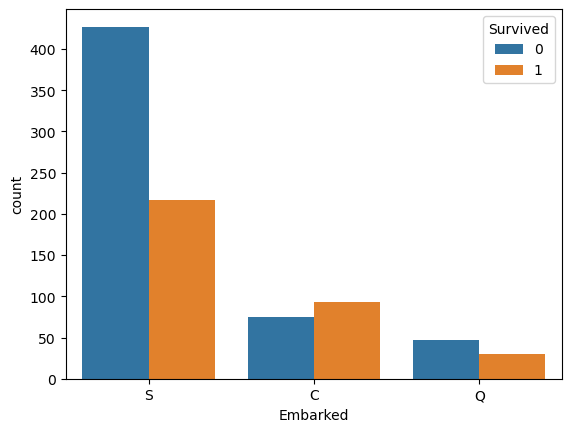

In [48]:
sns.countplot(data=train, x='Embarked', hue='Survived')

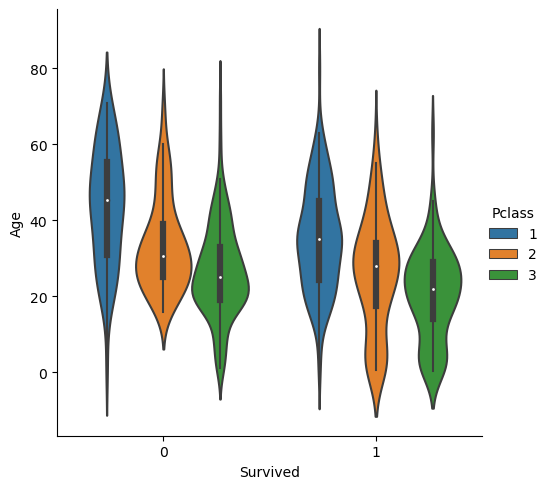

In [50]:
sns.catplot(data=train,x='Survived',y='Age',hue='Pclass',kind='violin')

<Axes: >

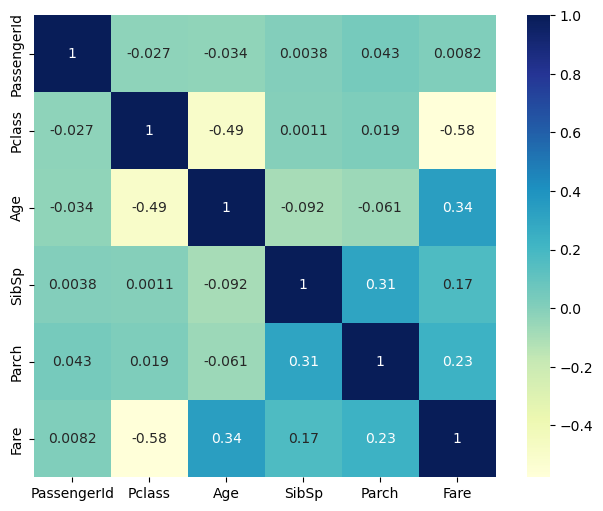

In [51]:
corr=titan.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,cmap='YlGnBu',linecolor='black',square=True,annot=True)

<Axes: xlabel='Age', ylabel='Density'>

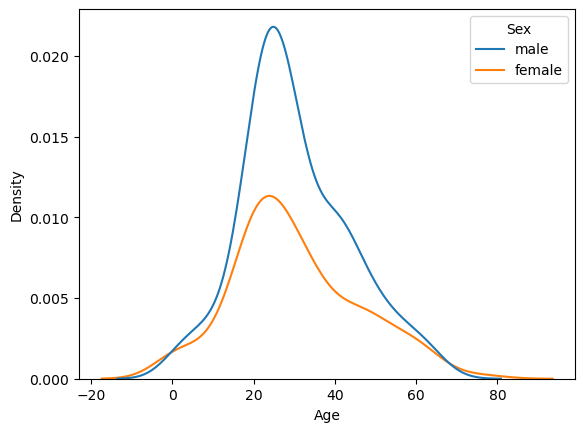

In [53]:
#what average of ages in each category
sns.kdeplot(data = titan, x ="Age",hue="Sex")

<Axes: xlabel='Age', ylabel='Fare'>

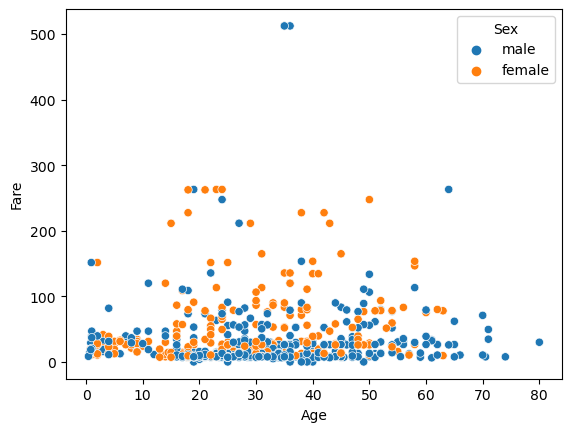

In [55]:
sns.scatterplot(data=train, x="Age",y="Fare",hue="Sex")

# Preprocessing Data 

In [56]:
titan=titan.drop(['PassengerId','Name','Ticket'],axis=1)

In [57]:
titan.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [58]:
#filled the missing value in age column with the mean value
titan['Age']=titan['Age'].fillna(titan['Age'].mean())
#filled the missing value in fare column with mean value
titan['Fare']=titan['Fare'].fillna(titan['Fare'].mean())

In [61]:
!pip install category_encoders

In [67]:
#converting categorical variable to numericaimport category_encoders as ce
encode = ce.OrdinalEncoder(cols=[ 'Pclass', 'Sex', 'Embarked'])
titan_encoded = encode.fit_transform(titan)
titan_encoded.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,1,34.5,0,0,7.8292,NaN,1
1,1,2,47.0,1,0,7.0000,NaN,2
2,2,1,62.0,0,0,9.6875,NaN,1
3,1,1,27.0,0,0,8.6625,NaN,2
4,1,2,22.0,1,1,12.2875,NaN,2


In [68]:
### splitting Independent and dependent variables

In [70]:
x=train_encoded.drop(['Survived'],axis=1)
y=train['Survived']